<a href="https://colab.research.google.com/github/saurab1994/Python_project/blob/main/Air_Traffic_Landings_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
# loading the dataset and relevent library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path =r"/content/Air_Traffic_Landings_Statistics.csv"
df =pd.read_csv(path)
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [223]:
# view data stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26842 entries, 0 to 26841
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              26842 non-null  int64 
 1   Operating Airline            26842 non-null  object
 2   Operating Airline IATA Code  26738 non-null  object
 3   Published Airline            26842 non-null  object
 4   Published Airline IATA Code  26738 non-null  object
 5   GEO Summary                  26842 non-null  object
 6   GEO Region                   26842 non-null  object
 7   Landing Aircraft Type        26842 non-null  object
 8   Aircraft Body Type           26842 non-null  object
 9   Aircraft Manufacturer        26825 non-null  object
 10  Aircraft Model               26842 non-null  object
 11  Aircraft Version             25684 non-null  object
 12  Landing Count                26842 non-null  int64 
 13  Total Landed Weight          26

In [224]:
# view null values
df.isnull().sum().reset_index(name ='Null_values').set_index("index")

,Null_values
index,
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,104
Published Airline,0
Published Airline IATA Code,104
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0
Aircraft Body Type,0


In [225]:
# dropping the columns "Published Airline IATA Code" and "Operating Airline IATA Code" from the data
df.drop(["Operating Airline IATA Code",'Published Airline IATA Code'],axis =1,inplace =True)

In [226]:
df.isnull().sum()

Activity Period             0
Operating Airline           0
Published Airline           0
GEO Summary                 0
GEO Region                  0
Landing Aircraft Type       0
Aircraft Body Type          0
Aircraft Manufacturer      17
Aircraft Model              0
Aircraft Version         1158
Landing Count               0
Total Landed Weight         0
dtype: int64

In [227]:
print(f'Number of Aircraft Manufacturer provider are {df["Aircraft Manufacturer"].nunique()}')

Number of Aircraft Manufacturer provider are 15


In [228]:
df['Aircraft Manufacturer'].value_counts(dropna =False)

Boeing               16141
Airbus                7154
Bombardier            1371
Embraer                888
McDonnell Douglas      856
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  29
LearJet                 18
NaN                     17
Swearingen              14
Piper                    9
BAE-Avro                 6
Lockheed                 5
Name: Aircraft Manufacturer, dtype: int64

In [229]:
print(f'number of Aircraft Version is {df["Aircraft Version"].nunique()}')

number of Aircraft Version is 90


In [230]:
# 
df['Aircraft Version'].value_counts(dropna =False).head()

-      11732
400     1663
300     1383
NaN     1158
800     1151
Name: Aircraft Version, dtype: int64

In [231]:
df["Aircraft Version"].replace(to_replace ="-",value =np.nan,inplace =True)

In [232]:
df['Aircraft Version'].value_counts(dropna =False).head()

NaN    12890
400     1663
300     1383
800     1151
200     1048
Name: Aircraft Version, dtype: int64

In [233]:
# converting the 'Activity Period' to a datetime column
df['Activity Period'] =pd.to_datetime(df["Activity Period"],format="%Y%m")

In [234]:
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,2005-07-01,ABX Air,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,2005-07-01,ABX Air,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,2005-07-01,Air Canada,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [235]:
# adding a year column to dataframe
df['year'] =df['Activity Period'].dt.year
year_ =df['year']
print(f'This dataset cover the Landings Statistics from year {year_.min()} to {year_.max()}')

This dataset cover the Landings Statistics from year 2005 to 2021


In [236]:
# Changing the 'Total Landed Weight' to Million Tonne
df['Total Landed Weight (Million Tonne)'] =df['Total Landed Weight']/10**6

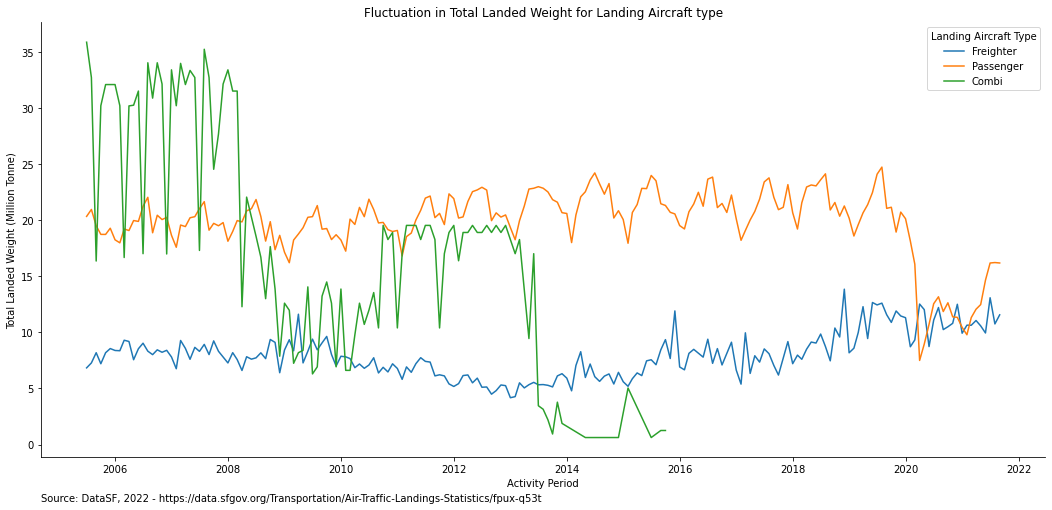

In [237]:
plt.figure(figsize =(18,8))
sns.lineplot(data =df,x='Activity Period',y ='Total Landed Weight (Million Tonne)',hue ='Landing Aircraft Type',ci =None);
sns.despine()
plt.title("Fluctuation in Total Landed Weight for Landing Aircraft type")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t',xy =(0,-.1),
             xycoords ='axes fraction')
plt.show()

Combination Flight have dropped after 2015 and also impact of covid on passenger flights can be clearly seen while the cargo flights landed weight trend remain unchanged

In [238]:
# calulating the yearly, mean landed weight for Landing Aircraft Type 
df2 =df.groupby(['year','Landing Aircraft Type'])['Total Landed Weight (Million Tonne)'].mean()

df2 =df2.reset_index(name ="Total Landed Weight (Million Tonne)")

# filtering passenger and cargo flights
df3 =df2[df2['Landing Aircraft Type']!='Combi']

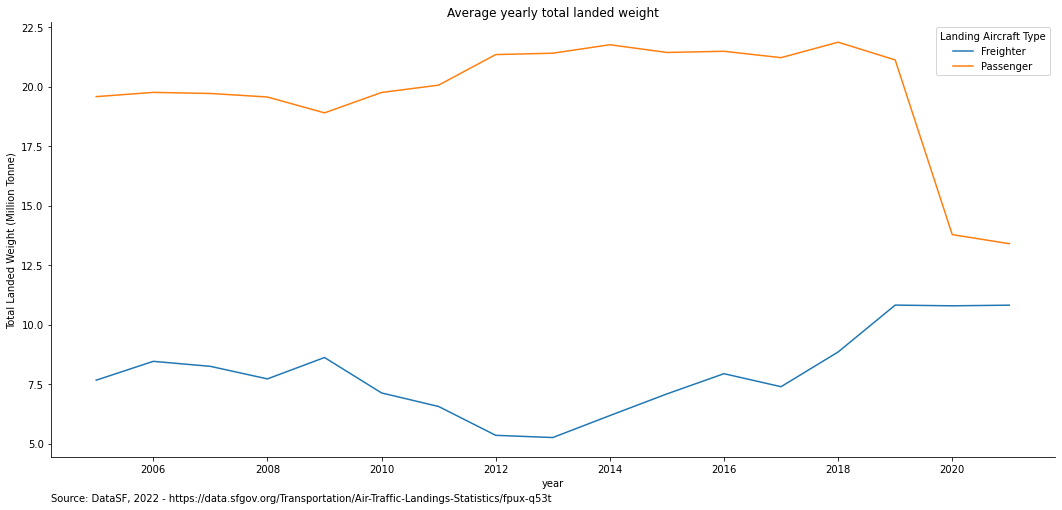

In [239]:
plt.figure(figsize =(18,8))
sns.lineplot(data =df3,x='year',y ='Total Landed Weight (Million Tonne)',hue ='Landing Aircraft Type');
sns.despine()
plt.title("Average yearly total landed weight")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t'
,xy =(0,-.1),xycoords ='axes fraction')
plt.show()

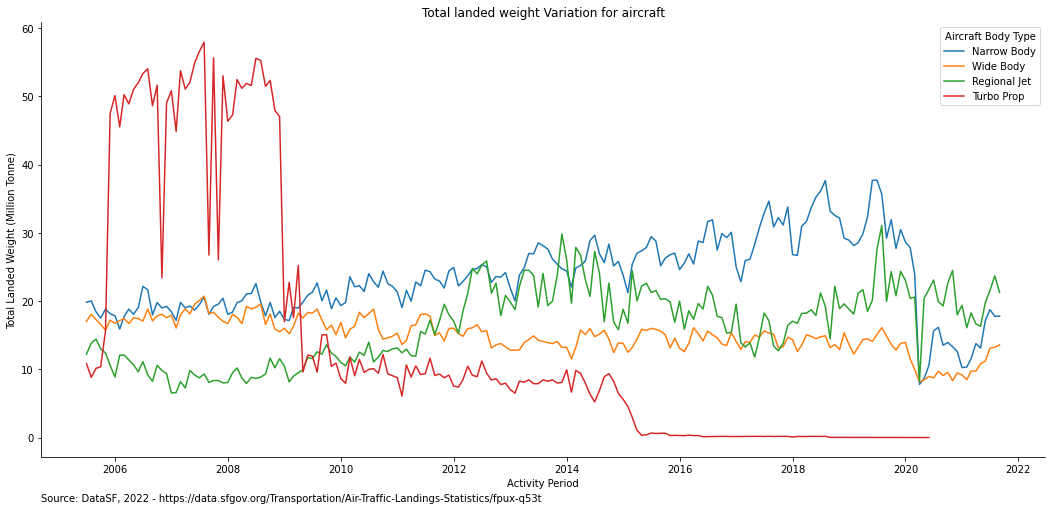

In [240]:
plt.figure(figsize =(18,8))
sns.lineplot(data =df,x='Activity Period',y ='Total Landed Weight (Million Tonne)',hue ='Aircraft Body Type',ci=None);
sns.despine()
plt.title('Total landed weight Variation for aircraft')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t'
,xy =(0,-.1),xycoords ='axes fraction')
plt.show()

Turbo Prop body type Aircarft shows a decline after year 2009 and after year 2015  its landed weight is 0 .No stats available after year 2015.
 
Narrow body aircraft shows a decrease trend after covid.Narrow body type aircraft is largly affected by covid

In [241]:
df4 =df.groupby(['year','Landing Aircraft Type','Aircraft Body Type'])['Total Landed Weight (Million Tonne)'].mean()
df4 =df4.reset_index()

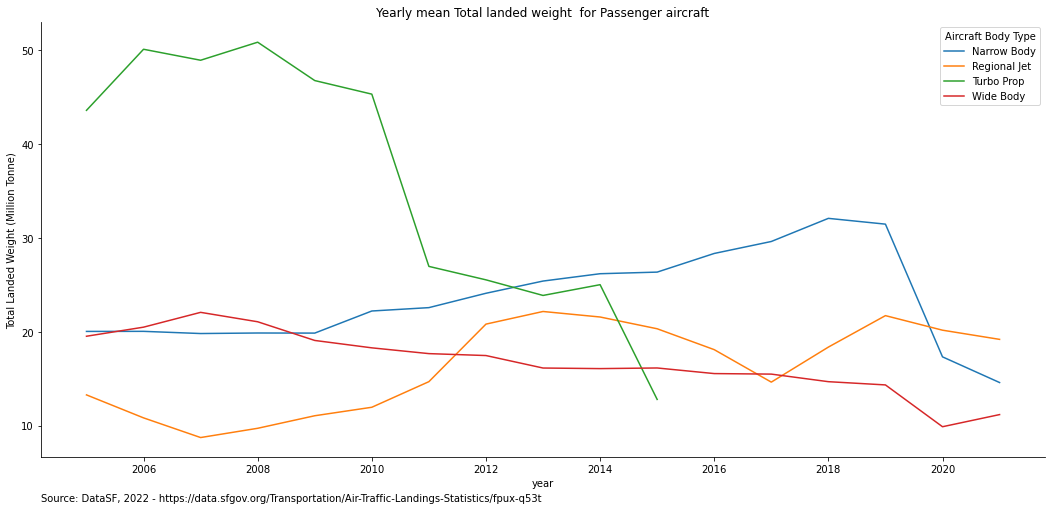

In [242]:
plt.figure(figsize =(18,8))
sns.lineplot(data =df4[df4['Landing Aircraft Type']=='Passenger'],x='year',y ='Total Landed Weight (Million Tonne)',hue ='Aircraft Body Type');
sns.despine()
plt.title('Yearly mean Total landed weight  for Passenger aircraft')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t'
,xy =(0,-.1),xycoords ='axes fraction')
plt.show()

Covid impact can be clearly seen on narrow body type passenger aircraft

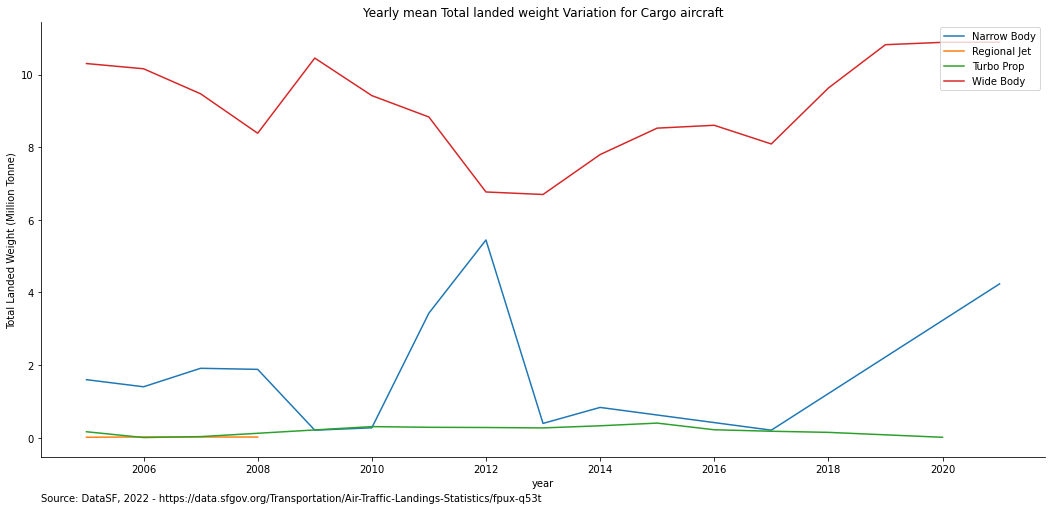

In [243]:
plt.figure(figsize =(18,8))
sns.lineplot(data =df4[df4['Landing Aircraft Type']=='Freighter'],x='year',y ='Total Landed Weight (Million Tonne)',hue ='Aircraft Body Type');
sns.despine()
plt.title('Yearly mean Total landed weight Variation for Cargo aircraft')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t'
,xy =(0,-.1),xycoords ='axes fraction')
plt.legend(loc ='upper right')
plt.show()

for cargo aircraft wide body type is dominating and a negative covid impact is clearly seen while for narrow body type aircraft seen a positive boom in covid 

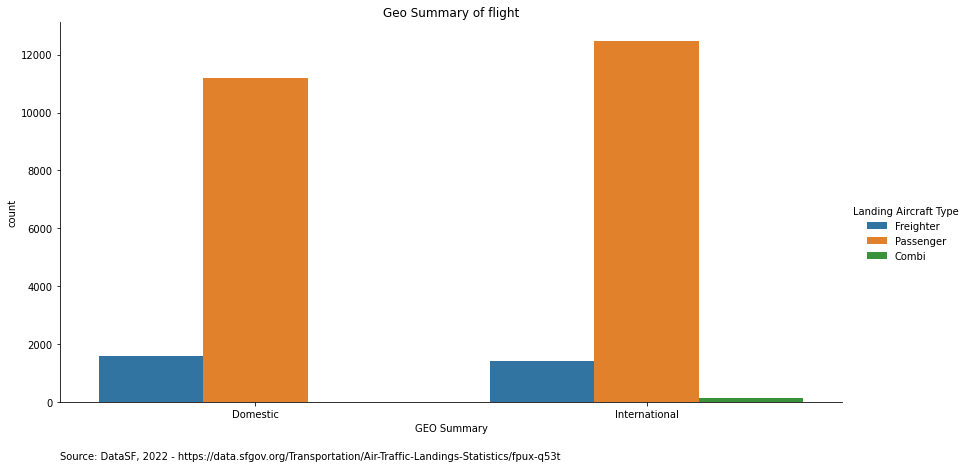

In [244]:
sns.catplot(data =df,x='GEO Summary',kind ='count',hue ='Landing Aircraft Type',height =6,aspect=2);
plt.title('Geo Summary of flight')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.15), 
             xycoords ='axes fraction' )
plt.show()

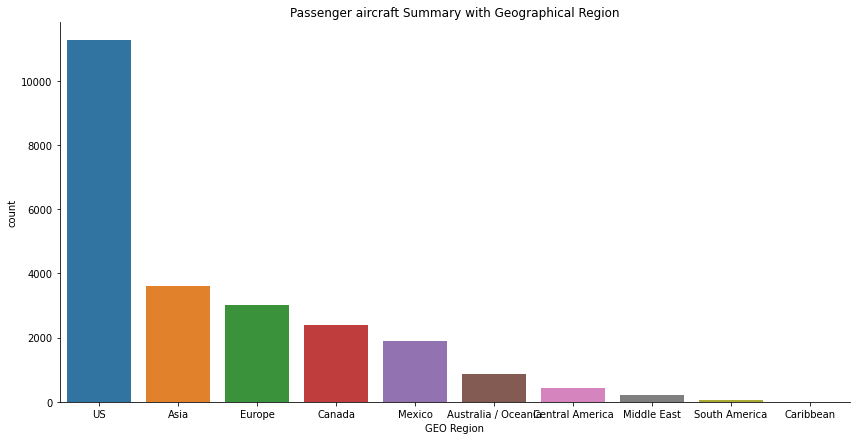

In [245]:
df2 =df[df['Landing Aircraft Type']=='Passenger']
sns.catplot(data =df2,x='GEO Region',kind ='count',height =6,aspect=2,
            order =df2['GEO Region'].value_counts().index);
plt.title('Passenger aircraft Summary with Geographical Region');

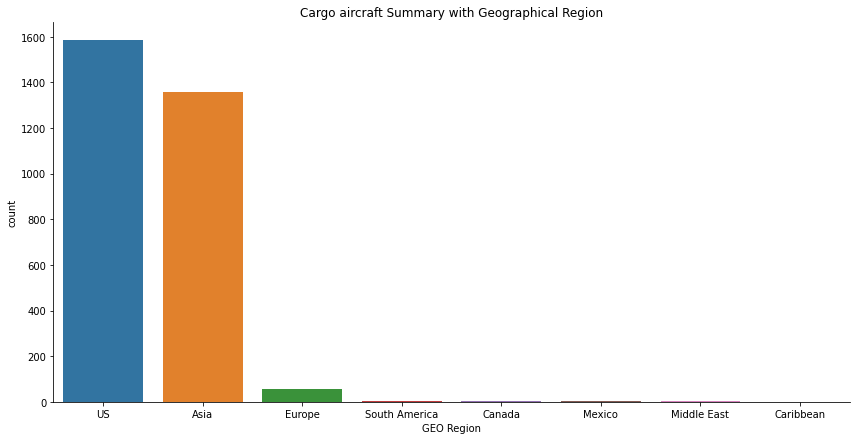

In [246]:
df2 =df[df['Landing Aircraft Type']=='Freighter']
sns.catplot(data =df2,x='GEO Region',kind ='count',height =6,aspect=2,
            order =df2['GEO Region'].value_counts().index);
plt.title('Cargo aircraft Summary with Geographical Region');

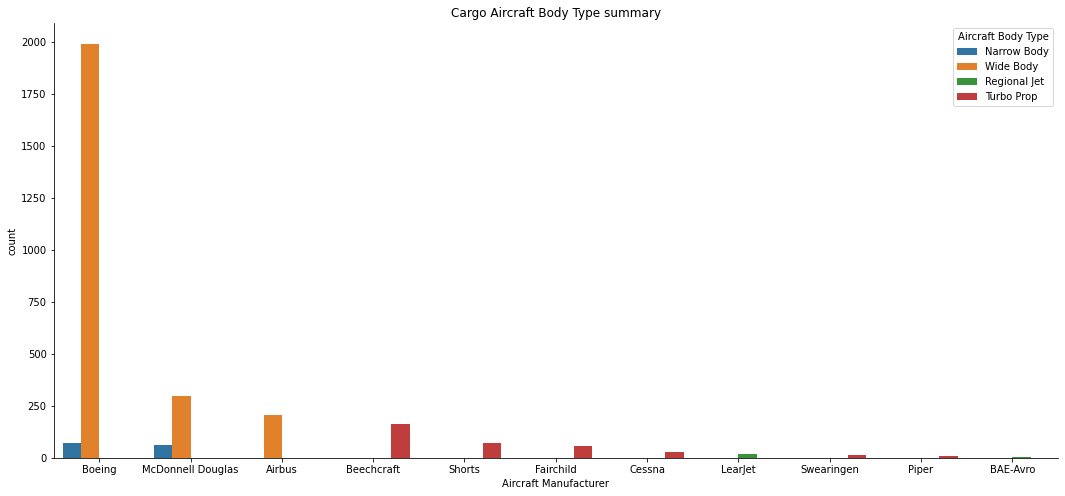

In [247]:
df2 =df[df['Landing Aircraft Type']=='Freighter']
plt.figure(figsize =(18,8))
sns.countplot(data =df2,x='Aircraft Manufacturer',hue ='Aircraft Body Type',
hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"],order =df2['Aircraft Manufacturer'].value_counts().index);
sns.despine()
plt.title('Cargo Aircraft Body Type summary');

Wide body type aircraft are mainly from Boeing for cargo segment 

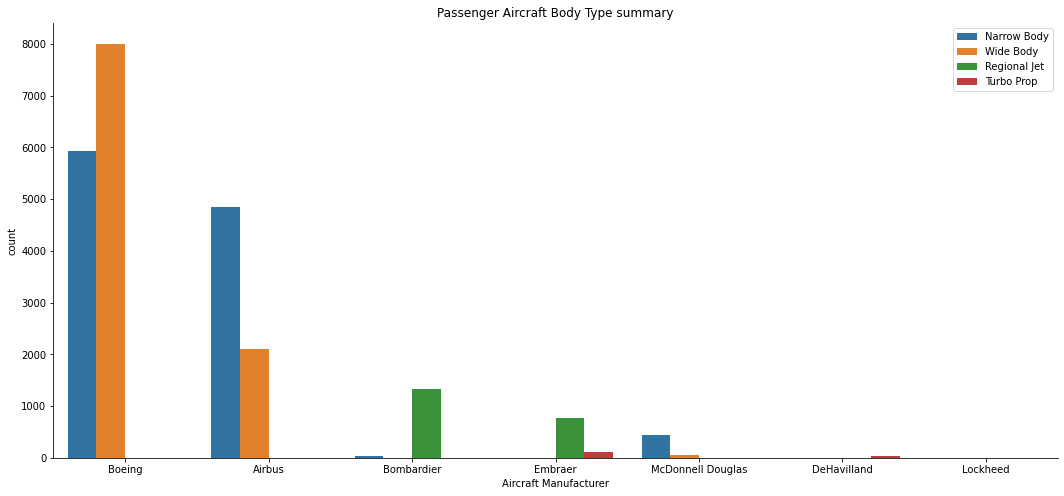

In [248]:
df2 =df[df['Landing Aircraft Type']=='Passenger']
plt.figure(figsize =(18,8))
sns.countplot(data =df2,x='Aircraft Manufacturer',hue ='Aircraft Body Type',
hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"],order =df2['Aircraft Manufacturer'].value_counts().index);
sns.despine()
plt.legend(loc='upper right')
plt.title('Passenger Aircraft Body Type summary');

IN passsenger segment Boeing and airbus are in dominating position.

Analyisng the passenger and Freighter segment for Boeing and Airbus

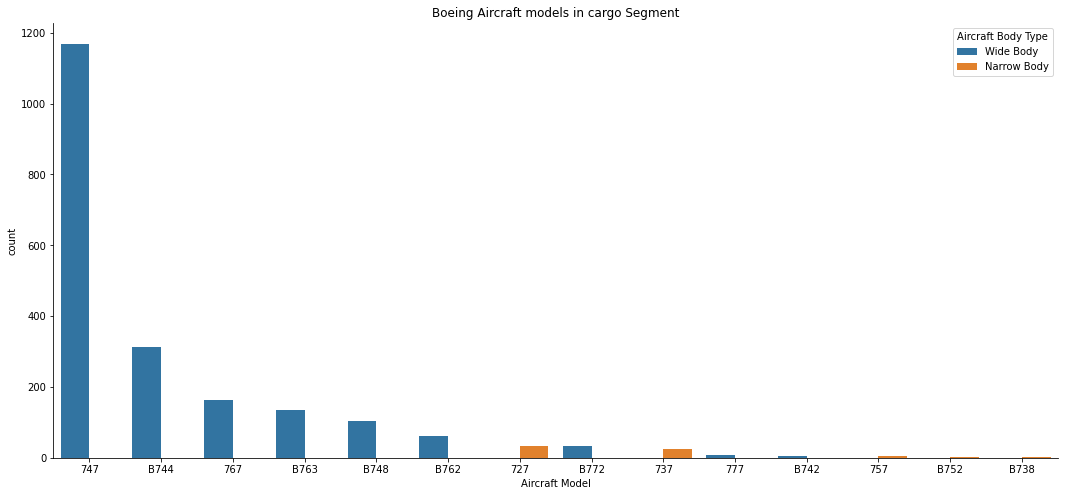

In [249]:
plt.figure(figsize=(18,8))
df3 =df[(df['Aircraft Manufacturer']=='Boeing') & (df['Landing Aircraft Type'] =='Freighter')]
sns.countplot(data =df3,x='Aircraft Model',hue ='Aircraft Body Type',
              order =df3['Aircraft Model'].value_counts().index);
sns.despine()
plt.title('Boeing Aircraft models in cargo Segment');

# model no 747 wide body is in dominance for Boeing

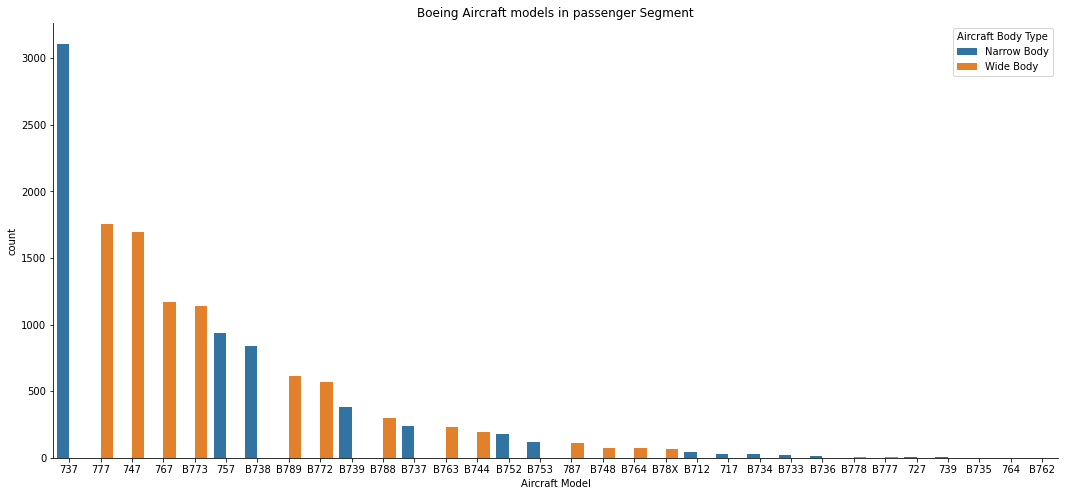

In [250]:
plt.figure(figsize=(18,8))
df3 =df[(df['Aircraft Manufacturer']=='Boeing') & (df['Landing Aircraft Type'] =='Passenger')]
sns.countplot(data =df3,x='Aircraft Model',hue ='Aircraft Body Type',
              order =df3['Aircraft Model'].value_counts().index);
sns.despine()
plt.title('Boeing Aircraft models in passenger Segment');

# model no 737 narrow body is in dominance for Boeing

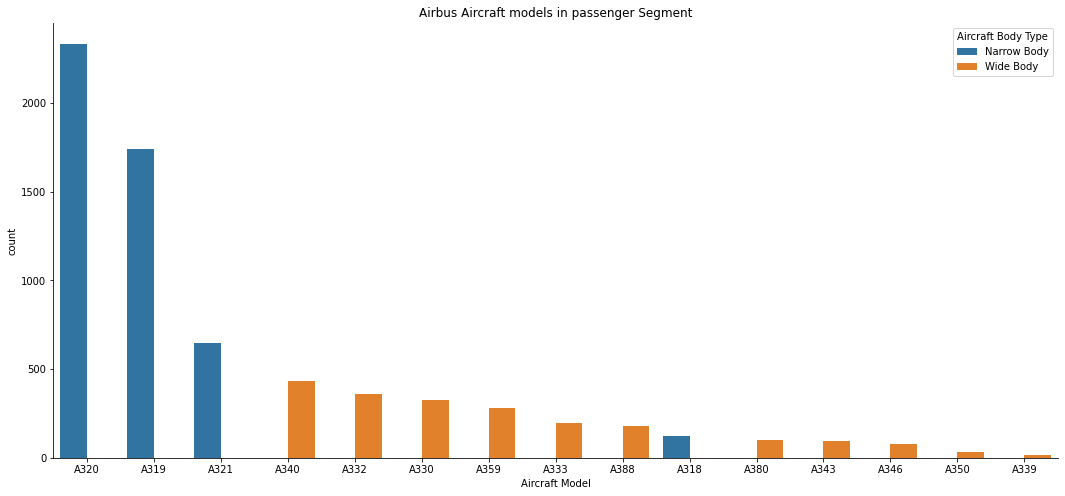

In [251]:
plt.figure(figsize=(18,8))
df3 =df[(df['Aircraft Manufacturer']=='Airbus') & (df['Landing Aircraft Type'] =='Passenger')]
sns.countplot(data =df3,x='Aircraft Model',hue ='Aircraft Body Type',
              order =df3['Aircraft Model'].value_counts().index);
sns.despine()
plt.title('Airbus Aircraft models in passenger Segment');

# model no A320 narrow body is in dominance for Airbus 

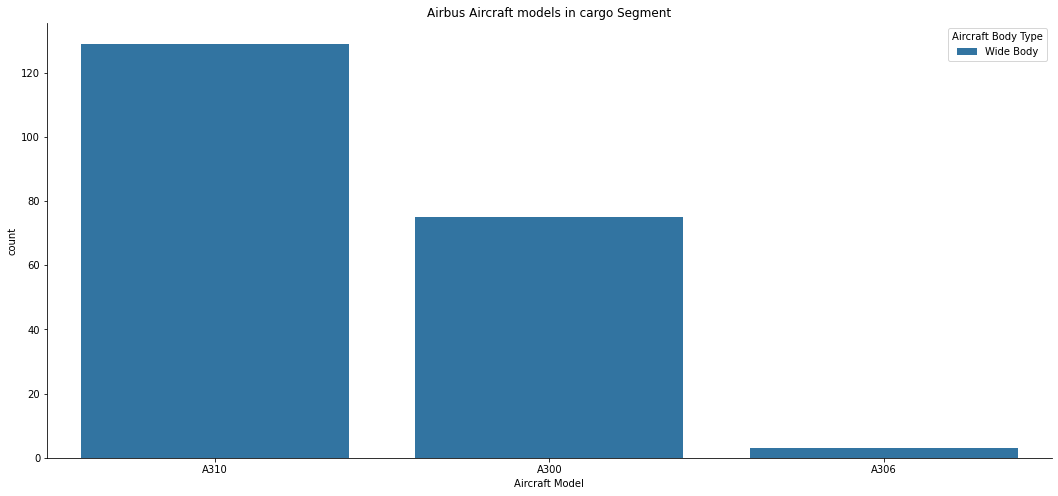

In [252]:
plt.figure(figsize=(18,8))
df3 =df[(df['Aircraft Manufacturer']=='Airbus') & (df['Landing Aircraft Type'] =='Freighter')]
sns.countplot(data =df3,x='Aircraft Model',hue ='Aircraft Body Type',
              order =df3['Aircraft Model'].value_counts().index);
sns.despine()
plt.title('Airbus Aircraft models in cargo Segment');

# model no A320 narrow body is in dominance for Airbus 

**Conclusions:**

Passenger segment is got affected by covid while cargo segment is more or less following the preious trend. Operation of turbo prop body type is stopped and now market is mainly dominated by narrow body and wide body type Aircraft.

Boeing dominates the market both in cargo and Passenger with its model no 747 wide body and 737 narroow body repectively.